<center><span style="font-size:50px"> INFORMATION-THEORY & HYPERSCANNING TUTORIAL</span></center>

***
***

Efficiently calculate mutual information (MI), transfer entropy (TE), and causal emergence for hyperscanning data using Lizier's (2014, doi:10.3389/frobt.2014.00011) JIDT toolkit and other methods, specified where appropriate.

 
Information-theoretic measures are non-parametric by design and are thus sensitive to nonlinear dynamics. Standard connectivity measures including PLV, (w)PLI, CCorr, etc. are parametric measures.

***
<br> 
<b><span style="font-size:20px">Shannon Entropy</span></b>

This is the expected value of Shannon information content and can be understood as a general measure of "surprise" or "unpredictability" of a variable $X$. Respectively, for discrete data/estimators (e.g., binning, symbolic), Shannon entropy is given by 

$$H(X) = -\sum_{x \in \mathcal{X}}p_X(x)\log_2p_X(x)$$

and for continuous data/estimators (box kernel, kNN, Gaussian), Shannon or "differential" entropy is given by

$$H(X) = -\int_{\mathcal{X}}p_X(x)\log_2p_X(x)$$

<br> <br> <br>
<b><span style="font-size:20px">Mutual Information</span></b>

The 3H estimator is often used to calculate mutual information.
\begin{align} \notag
I(X;Y) &\equiv H(X) + H(Y) - H(X,Y) \\ \notag
&\equiv H(X) - H(X|Y) \\ \notag
&\equiv H(Y) - H(Y|X) \\ \notag
&\equiv H(X,Y) - H(X|Y) - H(Y|X) \notag
\end{align}

Mutual information can also be understood as measuring the divergence between the joint probability of two variables and the product of their marginal distributions (aka Kullback-Liebler Divergence: $D_{\text{KL}}(P_{XY} \,||\, P_{X} \otimes P_{Y})$). In this way, mutual information can be determined in the following way

$$ I(X;Y) = \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$
$$ I(X;Y) = \int_{\mathcal{X}}\int_{\mathcal{Y}}p_{XY}(x,y)\log_2\left(\frac{p_{XY}(x,y)}{p_X(x)p_Y(y)}\right) $$


<br> <br> <br>
<b><span style="font-size:20px">Transfer Entropy</span></b>

The transfer entropy (TE) between a source variable $Y$ on a target variable(s) $X$ can be interpreted as the predictive ability of $\bm{Y}_{t-1} := (Y_{t-1}, Y_{t-2}, \ldots, Y_{t-l})$ (i.e., the past states of $\bm{Y}$ until embedding history length $l$) on $X_t$ (i.e., the current state of $\bm{X}$), over and above $\bm{X}_{t-1}$ (i.e., $\bm{X}$'s own past states). In other words, TE quantifies how much the future state of $\bm{X}$ can be predicted by knowing the past and present states of another system $\bm{Y}$, beyond what is predictable from the past of the target system $\bm{X}$ alone. Simpler still, it addresses the question "how well/much better does $\bm{Y}$ know $\bm{X}$, more than it knows itself?" 
TE is a dynamic and directional ($\therefore$ asymmetric) measure of information transfer between two variables. However, and critically, since this measure is not conditioned on any other potentially causal variables but just a pairwise statistical measure, TE should not be (at least strictly) interpreted as quantifying causality per se. Instead, this pairwise approach should be understood as \textbf{apparent transfer entropy} (Lizier, 2014). In any case, so-called apparent TE is given by

\begin{align} \notag
    TE_{Y\rightarrow X}^{(k,l,u,\tau)} &= I(\bm{Y}_{t-u}^{(l,\tau_Y)}; X_t | \bm{X}_{t-1}^{(k,\tau_X)}) \\ \notag
    &= \sum_{\substack{x_t, \, \bm{x}_{t-1}^{(k,\tau_X)} \in \mathcal{X}, \\ \bm{y}_{t-u}^{(l,\tau_Y)} \in \mathcal{Y}}} p\left(x_t, \bm{x}_{t-1}^{(k,\tau_X)}, \bm{y}_{t-u}^{(l,\tau_Y)}\right) \log_2 \left( \frac{p\left(\bm{y}_{t-u}^{(l,\tau_Y)}, x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)}{p\left(x_t | \bm{x}_{t-1}^{(k,\tau_X)}\right)} \right)
\end{align}

with parameters including embedding history length for source ($l$) and target ($k$), embedding delay for source ($\tau_Y$) and target ($\tau_X$), and some causal delay or interaction lag $u$. Respectively, the embedded target and source states can be given as $\bm{x}_{t-1}^{(k,\tau_X)} = \{ x_{t-(k-1)\tau_X}, \ldots, x_{t-\tau_X}, x_{t-1} \}$ and embedded source state $\bm{y}_{t-1}^{(l,u,\tau_Y)} = \{ y_{t-u-(l-1)\tau_Y}, \ldots, y_{t-u-\tau_Y}, y_{t-u} \}$, here with the additional parameter of causal delay offsetting all realisations by some time step $u$. (For concision, probability spaces are omitted from the equation.)


<br> <br> <br>
<b><span style="font-size:20px">Integrated Information Decomposition</span></b>

Integrated information decomposition ($\Phi\text{ID}$) desribes the informational dynamics between two time-series. It exhaustively decomposes the time-delayed mutual information (TDMI) of multivariate processes, describing the dynamics of redundant, unique, and synergistic information. Here, one can specify how delayed the TDMI is (with $\tau$) and one can choose the redundancy functions deployed: minimum mutual information (MMI) or Common Change in Surprisal (CCS).

Mathematically, the double redundancy function, $\forall \alpha \rightarrow \beta \in \mathcal{A} \times \mathcal{A}$, can be generally given by 

$$ I_{\cap}^{\alpha \rightarrow \beta} = \sum_{\alpha'\rightarrow\beta' \preceq \alpha \rightarrow\beta} I_{\partial}^{\alpha'\rightarrow\beta'}. $$ 
Here, individual $\Phi\text{ID}$ atoms can then be derived as follows
$$ I_{\partial}^{\alpha \rightarrow \beta} = I_{\cap}^{\alpha \rightarrow \beta} - \sum_{\alpha'\rightarrow\beta' \prec \alpha \rightarrow\beta} I_{\partial}^{\alpha' \rightarrow \beta'}, $$ 
leaving the following conclusive equation for their total mutual information or, more specifically, their "time-delayed mutual information":
\begin{align} \notag
    \text{TDMI} &= I(\bm{X_t};\bm{X_{t'}}) \\ \notag
    &= \text{Syn}(X_t^1,X_t^2; \bm{X}_{t'}) + \text{Unq}(X_t^1; \bm{X}_{t'}|X_t^2) + \text{Unq}(X_t^2; \bm{X}_{t'}|X_t^1) + \text{Rdn}(X_t^1,X_t^2; \bm{X}_{t'}) \\  \notag
    &= \sum_{\alpha, \beta \in \mathcal{A}} I_{\partial}^{\alpha \rightarrow \beta}.
\end{align}



***
***
<center><span style="font-size:40px">ESTIMATORS</span></center>

Given that information-theoretic measures are probability-based measures, they rely on probability distributions both marginal and joint. However, given that we can never truly know the underlying probability mass distributions or probability density distributions for discrete or continuous variables, respectively, we must estimate them. Various estimations have been given, the most used of which are provided and implemented below. 
***
***
<br> 
<b><span style="font-size:20px">1. Binning/Histogram Estimator</span></b>

Discretising time series into equal-width bins and measuring marginal and joint probability distributions as the frequency of occurences in each bin, s.t.

$$p(X=x_i) = \frac{n_i}{N}$$

where $x_i$ is the value of the $i$-th observation (or time point) and $N$ is the total number of observations.
<br>

***
<br>
<b><span style="font-size:20px">2. Kraskov–Stögbauer–Grassberger Estimators</span></b>

Using k-nearest neighbour structure, the two KSG estimators for mutual information and conditional mutual information, respectively, are given as:

\begin{align} \notag
  \hat{I}^{(1)}(X;Y) &= \psi(k) - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_x(i) + 1) + \psi(n_y(i) + 1)\right] + \psi(N) \\ \notag

  \hat{I}^{(2)}(X;Y) &= \psi(k) - \frac{1}{k} - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_x(i)) + \psi(n_y(i))\right] + \psi(N) \\ \notag

  {}^{C}\!\hat{I}^{(1)}(X;Y|Z) &= \psi(k) - \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_{xz}(i)) - \psi(n_{yz}(i)) + \psi(n_z(i))\right] + \psi(N) \\ \notag

  {}^{C}\!\hat{I}^{(2)}(X;Y|Z) &= \psi(k) - \frac{2}{k}  + \frac{1}{N} \sum_{i=1}^{N} \left[\psi(n_{z}(i)) - \psi(n_{xz}(i)) + \frac{1}{n_{xz}(i)} - \psi(n_{yz}(i)) + \frac{1}{n_{yz}(i)}\right] + \psi(N) \notag
  \end{align}

where $\psi$ is the digamma function (given below), $k$ is the number of nearest neighbours considered, $N$ is the total number of samples, $n_x(i)$ is the number of points within $\epsilon_i$ distance in the $X$-space for the $i$-th point, and $n_y(i)$ is the number of points within $\epsilon_i$ distance in the $Y$-space for the $i$-th point.

$$ \psi(x) = \frac{d}{dx}\ln(\Gamma(x)) = \frac{\Gamma'(x)}{\Gamma(x)}$$

<br>

***
<br> 
<b><span style="font-size:20px">3. Box Kernel Estimator</span></b>

Based on non-parametric kernel density estimations, the probability density function is estimated as

$$ \hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$
$$
  K(u) = 
  \begin{cases} 
    \frac{1}{2} & \text{if } |u| \leq 1 \\
    0 & \text{otherwise}
  \end{cases}
$$

where $n$ is the the sample size, $h$ is the bandwidth parameter (controlling the smoothness of the resulting density estimate), and $K$ is the (box) kernel function. 



<br>

***
<br> 
<b><span style="font-size:20px">4. Gaussian Estimator</span></b>

Assumes Gaussianity of probability distributions, namely $X,Y \sim \mathcal{N}(\mu, \sigma^2)$, and therefore gives closed-form expressions for the following entropic measures.

$$ \hat{H}(X) = \frac{1}{2} \ln \left(2\pi e \sigma_X^2\right) $$

$$ \hat{I}(X;Y) = \frac{1}{2} \ln \left( \frac{\sigma_X^2 \sigma_Y^2}{\sigma_X^2\sigma_Y^2 - \sigma_{XY}^2}\right) $$



<br> For transfer entropy, given Gaussianity, it is equivalent to Granger causality or "Granger prediction" (Cohen, 2014). Therefore, we can express two variables as (linear) vector autoregressive models in the following way

$$ Y_t = \sum_{i=1}^{p} a_i Y_{t-i} + \sum_{i=1}^{p} b_i X_{t-i} + \epsilon_t $$
<br>

***
<br>
<b><span style="font-size:20px">5. Symbolic Estimator</span></b>

NOTE: JIDT does not offer a Symbolic MI calculator, only TE. Symbolic MI has been handcoded. 

TO READ: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.100.158101

***
***

In [1]:
# CORE
import io
from collections import OrderedDict
import requests

# DATA SCIENCE
import numpy as np
from scipy.stats import mode 

# HYPYP
from hypyp import prep 

# VISUALISATION
import matplotlib.pyplot as plt

# MNE
import mne

## INFO-THEORY MEASURES
from HyperIT.visualisations.it import *
from phyid.calculate import calc_PhiID
from phyid.utils import PhiID_atoms_abbr

In [1]:
full_freq = {'full_frq': [1, 48]}
freq_bands = OrderedDict(full_freq)

URL_TEMPLATE = "https://github.com/ppsp-team/HyPyP/blob/master/data/participant{}-epo.fif?raw=true"

def get_data(idx):
    return io.BytesIO(requests.get(URL_TEMPLATE.format(idx)).content)

epo1 = mne.read_epochs(get_data(1), preload=True) 
epo2 = mne.read_epochs(get_data(2), preload=True)
mne.epochs.equalize_epoch_counts([epo1, epo2])

sampling_rate = epo1.info['sfreq']

icas = prep.ICA_fit([epo1, epo2], n_components=15, method='infomax', fit_params=dict(extended=True), random_state = 42)
cleaned_epochs_ICA = prep.ICA_choice_comp(icas, [epo1, epo2])
cleaned_epochs_AR, _ = prep.AR_local(cleaned_epochs_ICA, strategy="union", threshold=50.0, verbose=True)

preproc_S1, preproc_S2 = cleaned_epochs_AR
data_inter = np.array([preproc_S1, preproc_S2])


NameError: name 'OrderedDict' is not defined

# HyperIT

The HyperIT Class is a framework that calculates pairwise Mutual Information (MI) and Transfer Entropy (TE) between channels, specifically handling continuous time-series data (including EEG, MEG, fNIRS) which may be epoched or unepoched. Most estimators — KSG, Box Kernel, Symbolic (TE only), and Gaussian — are equipped with statistical significance testing (SST) based on permutation/bootstrapping approaches. HyperIT also calculates information atoms using Integrated Integration Decomposition ($\Phi\text{ID}$). 


First, the HyperIT Class needs to be instantiated, passing participants' time-series data as np.ndarrays with either shape (epochs, channels, samples) or (channels, samples) as well as the channel names. Both time-series data must be of the same shape and length, and the number of channels should correspond to the length of channel_name lists. For intra-brain analysis, pass the same time-series data twice (i.e., data2 = data1) and either a single list or double (duplicated) list of channel names as follows ```[[ch1],[ch2]]``` or ```[[ch1]]```. Setting verbose to true will produce more detailed outputs in the console/terminal (defaults to False).

``` HyperIT(data1: np.ndarray, data2: np.ndarray, channel_names: List[str], verbose: bool = False) ```

Next, call the MI function and TE function , specifying the estimator type, whether to conduct statistical significance testing (SST), output visualisations, and (optionally) key arguments for the estimator type (outlined exhaustively below). The MI function will return only one matrix (since MI is a symmetric measure; $I(X;Y) = I(Y;X)$) and TE will return two matrices ($TE_{X\rightarrow Y}$, $TE_{Y\rightarrow X}$).

When SST is selected, matrices will return with shape (channels, channels, epochs, 4) where the last dimension is (local MI/TE result, SST distribution mean, SST distribution std, SST p-value), and when SST is not selected, matrices will return with the latter three values of the last dimension as null. Note, when the data is not epoched, the third dimension will have shape 1. 

``` compute_mi(estimator_type = 'kernel', calc_sigstats = True, vis = True, **kwargs) ```

``` compute_te(estimator_type = 'symbolic', calc_sigstats = True, vis = True, **kwargs) ```

PARAMETER OPTIONS FOR ESTIMATORS (defaults in parentheses):

- MI
    - **Histogram**: (No SST available yet)
    - **KSG 1**: kraskov_param (4), normalise (True)
    - **KSG 2**: kraskov_param (4), normalise (True)
    - **Kernel**: kernel_width (0.25), normalise (True)
    - **Gaussian**: normalise (True)
    - **Symbolic**: (No SST available yet)

- TE
    - **KSG**: k, k_tau, l, l_tau, delay, kraskov_param (all 1), normalise (True)
    - **Kernel**: k (1), kernel_width (0.5), normalise (True)
    - **Gaussian**: k, k_tau, l, l_tau, delay (all 1), bias_correction (False), normalise (True)
    - **Symbolic**: k (1)

<br>

Finally, the multivariate informational decomposition of the two time-series data can be computed using Integrated Information Theory ($\Phi\text{ID}$) using the ```phyid``` package. Specify the time delay, which redundancy function (Minimum Mutual Information or Common Change of Surprisal; 'mmi' or 'ccs'), whether to plot the lattice, and across which channels to decompose.

``` compute_atoms(tau=1, redundancy='mmi', vis=False, plot_channels=[5,12]) ```



## Initialise HyperIT Object

In [3]:
data1, data2 = data_inter
channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]

it = HyperIT(data1, data2, channel_names)

## Mutual Information and Transfer Entropy

100%|██████████| 31/31 [03:16<00:00,  6.35s/it]


Plotting for average MI/TE across epochs. Note that p-values will not be shown.


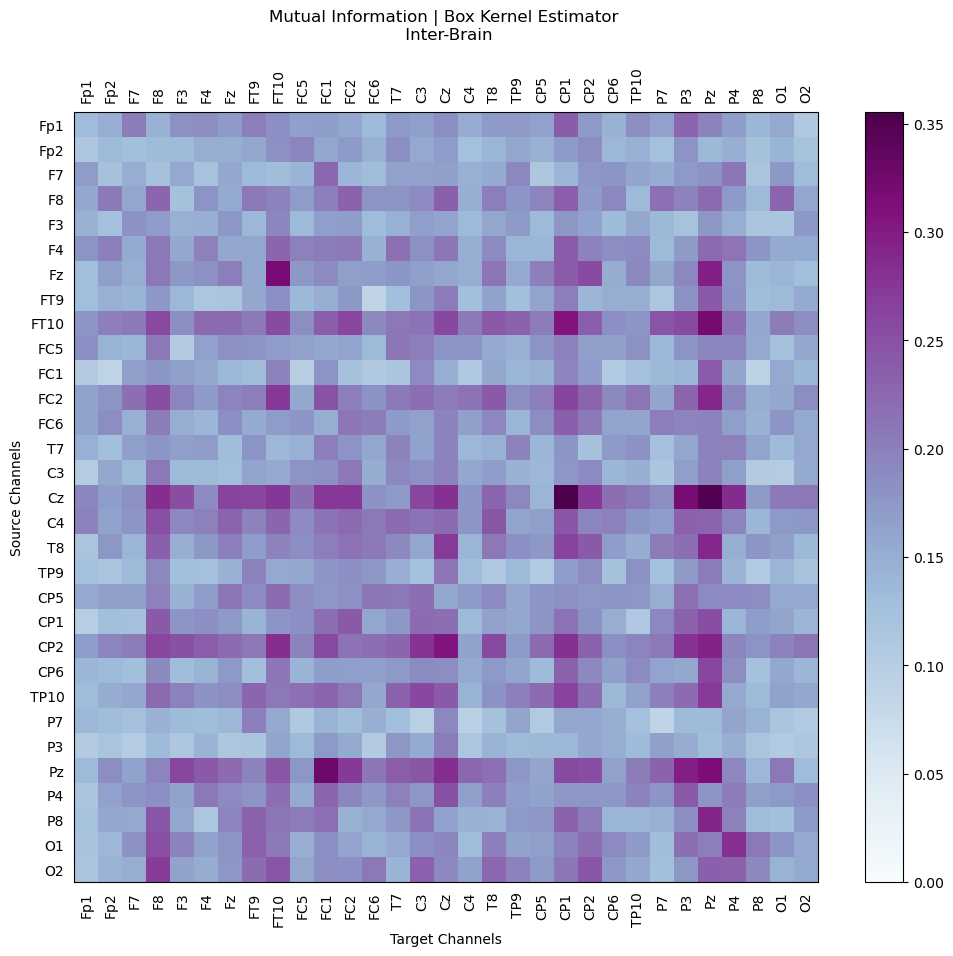

100%|██████████| 31/31 [05:52<00:00, 11.37s/it]


Plotting Transfer Entropy for X -> Y...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.


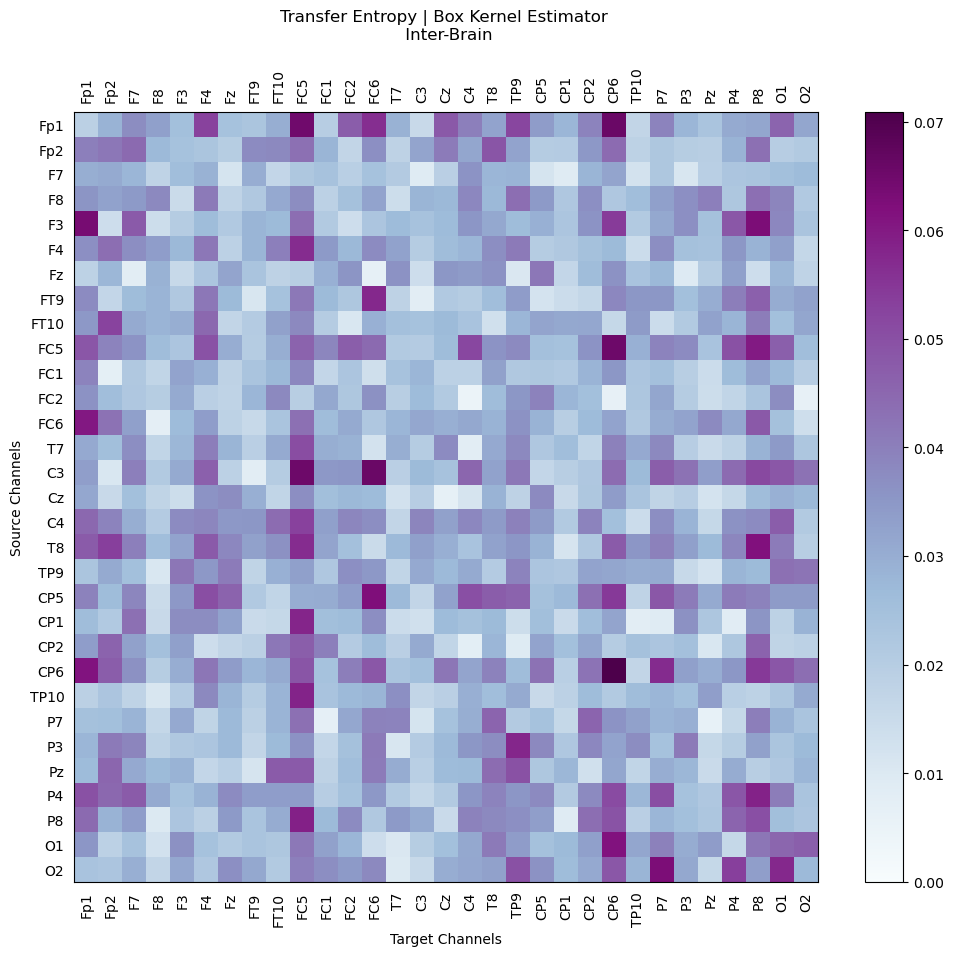

Plotting Transfer Entropy for Y -> X...
Plotting for average MI/TE across epochs. Note that p-values will not be shown.


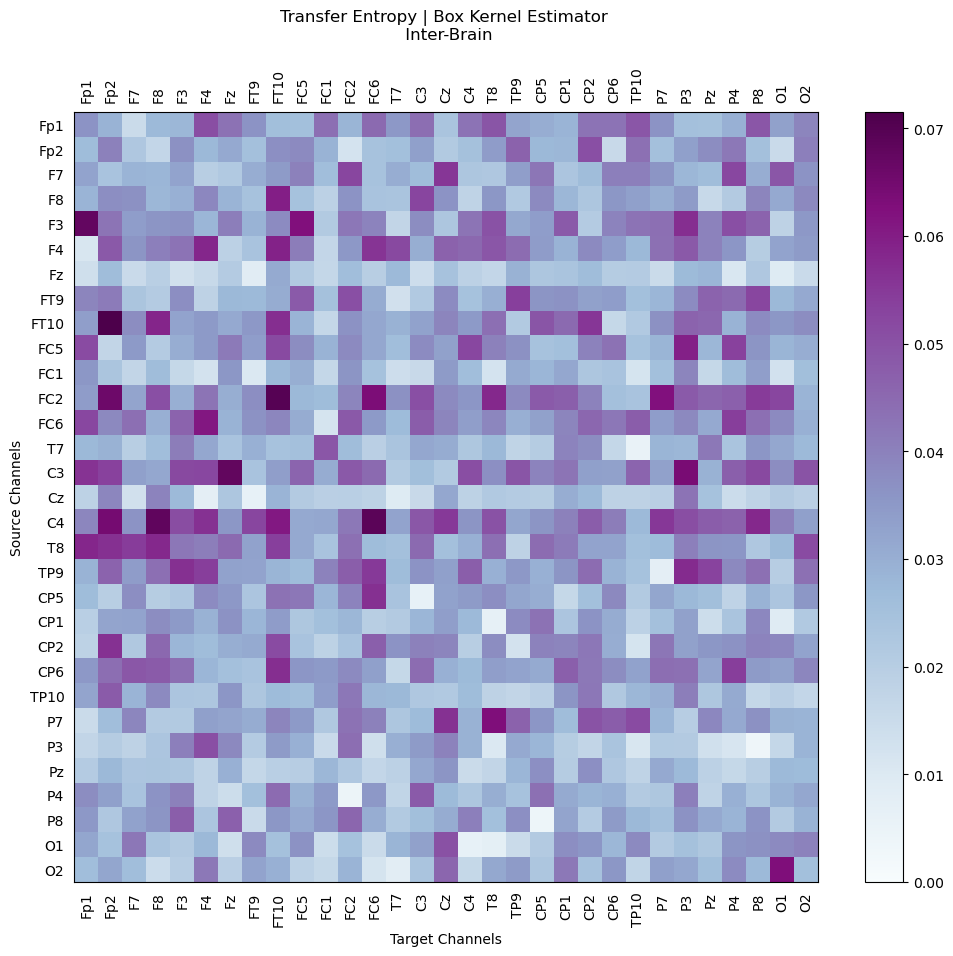

In [4]:
mi_matrix = it.compute_mi(estimator_type = 'kernel', calc_sigstats = False, vis = True)
te_matrix = it.compute_te(estimator_type = 'kernel', calc_sigstats = False, vis = True)

## Integrated Information Decomposition

- x = Unique X = {1} 
- y = Unique Y = {2}
- r = Redundancy = {1}{2}
- s = Synergy = {12}
- t = "to" -->

![Integrated Information Decomposition Atoms](visualisations/lattice_dict.png)

In [5]:
plot_channels = [0,0]
phi_dict_xy, phi_dict_yx = it.compute_atoms(tau=1, redundancy='mmi', vis=True, plot_channels=plot_channels)

100%|██████████| 31/31 [01:02<00:00,  2.03s/it]


[0, 0]


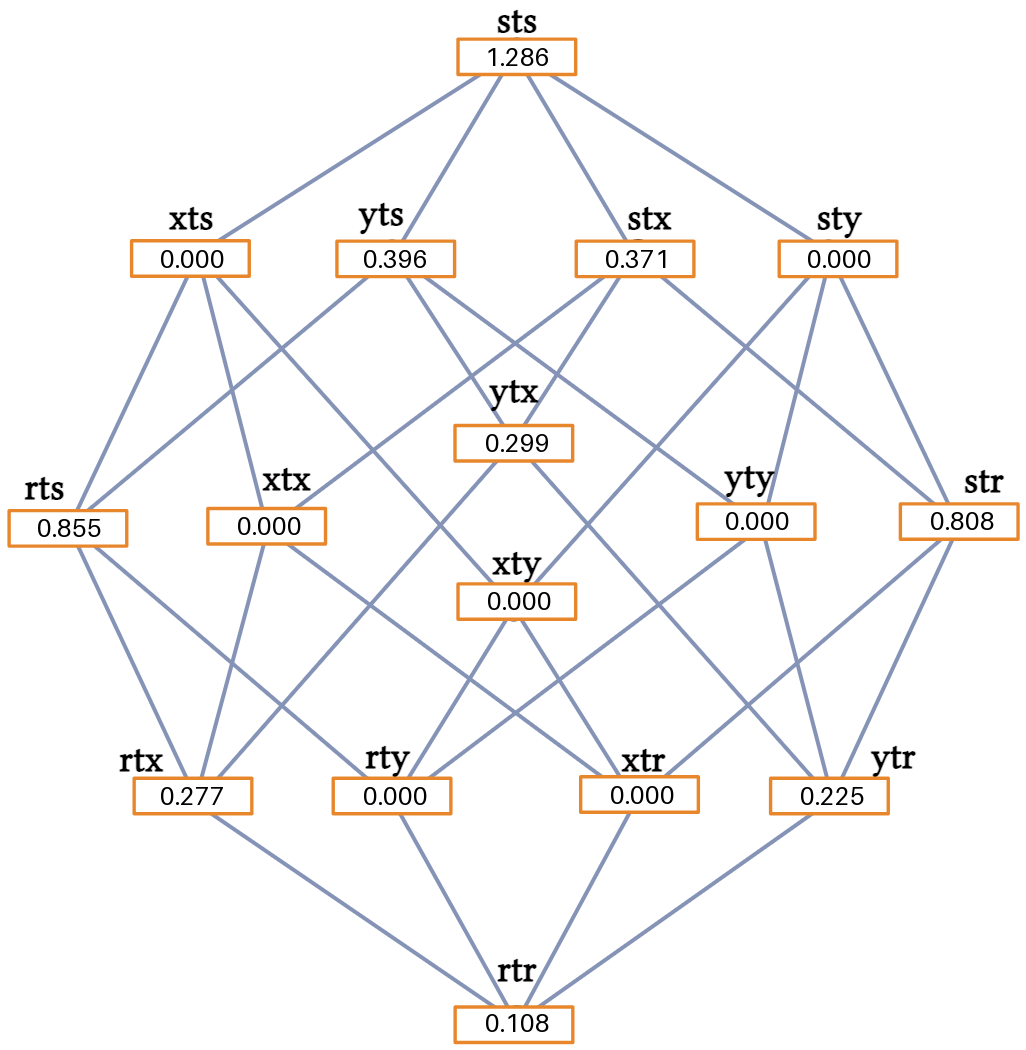

For further investigation of all the atomic informational decompositions, you can access these values as follows...

In [5]:
channel_index_X, channel_index_Y = plot_channels

chX_to_chY = phi_dict_xy[channel_index_X][channel_index_Y]
chY_to_chX = phi_dict_yx[channel_index_Y][channel_index_X]


print("TDMI (X->Y) = ", np.sum(list(chX_to_chY.values())))
for atoms_abbr, atom in chX_to_chY.items():
    print(f"{atoms_abbr}: {atom}")

print("TDMI (Y->X) = ", np.sum(list(chY_to_chX.values())))
for atoms_abbr, atom in chY_to_chX.items():
    print(f"{atoms_abbr}: {atom}")


TDMI (X->Y) =  4.625076187223847
rtr: 0.10810788730937768
rtx: 0.2765689644948378
rty: 0.0
rts: 0.8554140375640629
xtr: 0.0
xtx: 0.0
xty: 0.0
xts: 0.0
ytr: 0.22545849742507051
ytx: 0.29882614437715127
yty: 0.0
yts: 0.3955904921036179
str: 0.8079362893846118
stx: 0.37125976839456415
sty: 0.0
sts: 1.2859141061705526
TDMI (Y->X) =  4.368768212180361
rtr: 0.26654110799561714
rtx: 0.2517111556035554
rty: 0.0
rts: 0.6181079030357479
xtr: 0.0
xtx: 0.0
xty: 0.0
xts: 0.0
ytr: 0.36982471256239
ytx: 0.32621565038794387
yty: 0.0
yts: 0.3794167026651825
str: 0.6797190956788534
stx: 0.3797705514112533
sty: 0.0
sts: 1.0974613328398173


***
***

# ACCURACY TESTING

Feeding various fractions of hyperscanning data (10% to 100%), elbow graphs can help determine the amount of data (and $\therefore$ length of hyperscanning recordings) necessary for stable predictions from each estimator: first, by simulating a closed system with known interactions (linear and non-linear) for various lengths of time; then, apply to sample hyperscanning data (from HyPyP tutorial) made of 26 seconds (26 epochs of 1 second at 500Hz sampling frequency), such that each channel holds 13,026 data points or samples.

In [2]:
np.random.seed(42)
n = 50_000

A = np.zeros(n)
B = np.zeros(n)
C = np.zeros(n)
D = np.zeros(n)
E = np.zeros(n)
F = np.zeros(n)
A[0], B[0], C[0], D[0], E[0], F[0] = 0.1, 0.1, 0.1, 0.1, 0.1, 0.1

std_dev = 0.1
for t in range(1, n):
    A[t] = np.sin(C[t-1] + E[t-1]) + np.random.normal(0, std_dev)
    B[t] = 0.5 * A[t-1] + np.random.normal(0, std_dev)
    C[t] = 0.3 * B[t-1] + np.exp(-D[t-1]) + np.random.normal(0, std_dev)
    D[t] = D[t-1]**2 - 0.1 * D[t-1] + np.random.normal(0, std_dev)
    E[t] = 0.7 * B[t-1] + np.cos(A[t-1]) + np.random.normal(0, std_dev)
    F[t] = 3 * np.sin(F[t-1]) + np.random.normal(0, std_dev)

\begin{align} \notag
    A_{t'} &= \sin(C_t + E_t) + \xi_A \\ \notag
    B_{t'} &= 0.5 A_t + \xi_B \\ \notag
    C_{t'} &= 0.3 B_t + e^{-D_t} + \xi_C \\ \notag
    D_{t'} &= (D_t)^2 - 0.1 \cdot D_t + \xi_D \\ \notag
    E_{t'} &= 0.7 B_t + \cos(A_t) + \xi_E \\ \notag
    F_{t'} &= 3\sin(F_t) + \xi_F
\end{align}

![Node Network](visualisations/node_network.png)

Note: Arrows indicate direction of information transfer, black lines denote linear relations, dotted blue lines denote nonlinear relations, and self-connections denote a recursive node. 


## FOR MUTUAL INFORMATION:

![mi-hist](visualisations/elbow_graphs/node_network/mi_hist.png)
![mi-ksg](visualisations/elbow_graphs/node_network/mi_ksg.png)
![mi-kernel](visualisations/elbow_graphs/node_network/mi_kernel.png)
![mi-gaussian](visualisations/elbow_graphs/node_network/mi_gaussian.png)
![mi-symbolic](visualisations/elbow_graphs/node_network/mi_symbolic.png)

## FOR TRANSFER ENTROPY:



In [12]:
X = np.array([A, B, C, D, E, F])

channel_names = [['A', 'B', 'C', 'D', 'E', 'F'], ['A', 'B', 'C', 'D', 'E', 'F']]

fractions = np.arange(10, 110, 10)

for estimator in tqdm(['kernel', 'ksg', 'symbolic', 'gaussian']):
    channel_pair_te = {}

    for fraction in fractions:
        fraction_index = int(fraction * X.shape[1] / 100)
        te_matrix, _ = HyperIT(X[:, :fraction_index], X[:, :fraction_index], channel_names).compute_te(estimator_type=estimator, calc_sigstats=False, vis=False)
        
        for i in range(te_matrix.shape[0]):
            for j in range(te_matrix.shape[1]):
                channel_pair_te.setdefault((i,j), []).append(te_matrix[i, j, 0, 0])
    
    plt.figure(figsize=(20, 10))
    for (i, j), tes in channel_pair_te.items():
        if i < j:
            plt.plot(fractions, tes, label=f"I({channel_names[0][i]};{channel_names[1][j]})", linewidth=2)
    plt.xlabel("Percentage of data")
    plt.ylabel("Transfer Entropy")
    plt.xlim(10, 100)
    plt.ylim(0, np.max(list(channel_pair_te.values())) * 1.1)
    plt.legend()
    plt.title(f"Transfer Entropy, Estimator: {estimator.capitalize() if estimator != 'ksg' else 'KSG'}")
    plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

JVM already started.


100%|██████████| 6/6 [00:12<00:00,  2.15s/it]


JVM already started.


100%|██████████| 6/6 [00:49<00:00,  8.26s/it]


JVM already started.


100%|██████████| 6/6 [01:47<00:00, 17.85s/it]


JVM already started.


100%|██████████| 6/6 [03:09<00:00, 31.55s/it]


JVM already started.


100%|██████████| 6/6 [05:01<00:00, 50.29s/it]


JVM already started.


100%|██████████| 6/6 [07:27<00:00, 74.64s/it]


JVM already started.


100%|██████████| 6/6 [10:11<00:00, 101.89s/it]


JVM already started.


100%|██████████| 6/6 [13:33<00:00, 135.66s/it]


JVM already started.


INSERT ACCURACY TESTS HERE!

In [ ]:
X = data_inter[0].transpose(1, 0, 2).reshape(data_inter[0].shape[1], -1)
Y = data_inter[1].transpose(1, 0, 2).reshape(data_inter[1].shape[1], -1)
channel_names = [[epo1.info['ch_names']], [epo2.info['ch_names']]]


fractions = np.arange(10, 110, 10)

for estimator in tqdm(['histogram', 'ksg', 'kernel', 'gaussian', 'symbolic']):
    
    channel_pair_mi = {}

    for fraction in fractions:

        fraction_index = int(fraction * X.shape[1] / 100)
        mi_matrix = HyperIT(X[:, :fraction_index], Y[:, :fraction_index], channel_names).compute_mi(estimator_type=estimator, calc_sigstats=False, vis=False)
        
        for i in range(mi_matrix.shape[0]):
            for j in range(mi_matrix.shape[1]):
                channel_pair_mi.setdefault((i,j), []).append(mi_matrix[i, j, 0, 0])
    

    plt.figure(figsize=(20, 10))
    for (i, j), mis in channel_pair_mi.items():
        plt.plot(fractions, mis, alpha=0.2)
    plt.xlabel("Fraction of data")
    plt.ylabel("Mutual Information")
    plt.ylim(0, np.max(list(channel_pair_mi.values())) * 1.1)
    plt.title(f"Mutual Information, Estimator: {estimator.capitalize() if estimator != 'ksg' else 'KSG'}") 
    plt.show()

# Close HyperIT

In [9]:
del it